# What is LSTM?

Long Short-Term Memory (LSTM) is a type of Recurrent Neural Network (RNN) architecture. Unlike standard feedforward neural networks, LSTM has feedback connections that make it a "general-purpose computer" for processing sequences of data. This allows it to store information over long sequences and is exceptionally well-suited for various time-series prediction tasks.

Why LSTM for Stock Market Prediction?
Memory Cells: LSTMs are designed to remember past information and are ideal for sequence prediction problems. In the stock market, past stock prices are a good indicator of future stock behavior.

Handling Long Sequences: Traditional RNNs suffer from vanishing or exploding gradient problems. This makes them ineffective in learning from earlier time steps as the sequence gets longer. LSTMs are designed to combat these issues.

Feature Learning: LSTMs can learn to recognize important events (like economic indicators or market sentiments) and forget the non-important ones, making them very effective for financial time series where we have lots of irrelevant data points.

Robustness: LSTMs are less susceptible to noise in the data. Financial markets are highly volatile and noisy, but LSTMs can filter out the noise to make more accurate predictions.

Multivariate Time Series: LSTMs can handle scenarios where multiple variables influence the time series. For example, stock prices are influenced by opening price, lowest price of the day, highest price of the day, etc.

Real-Time Analysis: LSTMs can analyze and make predictions in real-time, a crucial requirement for stock trading where prices can change within seconds.

By using LSTM networks, you're leveraging these advantages to make more accurate and informed predictions about stock market movements. This can be a powerful tool in a financial analyst's arsenal, provided it's used responsibly and in conjunction with other methods for risk assessment.

# LSTM Stock Market Prediction for S&P 500
This notebook aims to predict the stock market moves for the S&P 500 using Long Short-Term Memory (LSTM) networks. The steps involved are as follows:
1. **Data Retrieval**: Fetch historical stock data for the S&P 500 from the Yahoo Finance API.
2. **Data Preprocessing**: Prepare the data for training, including normalization and reshaping.
3. **Model Building**: Create an LSTM model for time-series prediction.
4. **Training**: Train the model on the historical data.
5. **Prediction**: Use the model to predict stock prices for 2023.
6. **Evaluation**: Compare the predictions with actual historical data for 2023.
7. **Visualization**: Plot the predictions alongside the actual data.
Let's get started!

In [ ]:
!pip install tensorflow

In [ ]:
!pip install -q yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

## Step 1: Data Retrieval
Let's start by fetching the historical stock data for the S&P 500 from the Yahoo Finance API. We'll retrieve data from 2010 to 2023.

In [ ]:
# Fetch historical stock data for S&P 500 from 2010 to 2023
ticker = '^GSPC'
start_date = '2010-01-01'
end_date = '2023-09-02'
data = yf.download(ticker, start=start_date, end=end_date)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


## Step 2: Data Preprocessing
Now that we have the historical data, let's preprocess it for our LSTM model. We'll focus on the 'Close' prices and perform the following steps:
1. Normalize the data
2. Create training and test datasets
3. Reshape the data for LSTM input

In [ ]:
# Extract 'Close' prices and convert to numpy array
close_data = data['Close'].values.reshape(-1, 1)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data)

# Create training and test datasets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

# Reshape the data for LSTM input
X_train, y_train, X_test, y_test = [], [], [], []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_test, y_test = np.array(X_test), np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

X_train.shape, X_test.shape

((2692, 60, 1), (628, 60, 1))

## Step 3: Model Building
With our data preprocessed, we can now build the LSTM model. The architecture will consist of:
1. An LSTM layer with 50 units and a 'relu' activation function
2. A Dense layer with 25 units
3. A Dense layer with 1 unit (output layer)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, activation='relu', return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


## Step 4: Training
Now that our model is built, let's train it on our training data. We'll use the following parameters:
1. `epochs=25`: Number of iterations over the entire dataset
2. `batch_size=64`: Number of samples per gradient update
3. `validation_data`: Data on which to evaluate the loss and any model metrics at the end of each epoch

In [ ]:
# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=25,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/25
43/43 [==============================] - 13s 236ms/step - loss: 0.0200 - val_loss: 0.1125
Epoch 2/25
43/43 [==============================] - 6s 145ms/step - loss: 4.1500e-04 - val_loss: 0.0092
Epoch 3/25
43/43 [==============================] - 6s 146ms/step - loss: 2.6775e-04 - val_loss: 0.0062
Epoch 4/25
43/43 [==============================] - 6s 150ms/step - loss: 2.5859e-04 - val_loss: 0.0064
Epoch 5/25
43/43 [==============================] - 6s 150ms/step - loss: 2.6269e-04 - val_loss: 0.0062
Epoch 6/25
43/43 [==============================] - 6s 148ms/step - loss: 2.3273e-04 - val_loss: 0.0047
Epoch 7/25
43/43 [==============================] - 6s 145ms/step - loss: 2.2621e-04 - val_loss: 0.0017

## Step 5: Prediction
Let's use the trained model to make predictions on our test data. We'll then transform these predictions back to their original scale using the MinMaxScaler.

In [ ]:
# Make predictions using the test data
predictions = model.predict(X_test)
# Transform predictions back to original scale
predictions = scaler.inverse_transform(np.reshape(predictions, (-1, 1)))
# Create a DataFrame to store the actual and predicted values
test_data_range = data.iloc[train_size + 60:]['Close'].index
comparison_df = pd.DataFrame({'Actual': data.iloc[train_size + 60:]['Close'].values, 'Predicted': np.squeeze(predictions)}, index=test_data_range)
comparison_df.head()

20/20 [==============================] - 1s 42ms/step


,Actual,Predicted
Date,,
2021-03-08,3821.350098,3808.218750
2021-03-09,3875.439941,3796.629150
2021-03-10,3898.810059,3793.227783
2021-03-11,3939.340088,3797.271484
2021-03-12,3943.340088,3809.306152


## Step 6: Evaluation
Now that we have our predictions, let's evaluate the model's performance. We'll calculate the Root Mean Square Error (RMSE) to quantify the model's accuracy.

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate RMSE
rmse = sqrt(mean_squared_error(comparison_df['Actual'], comparison_df['Predicted']))
rmse

105.4471718225548

Interpretation of results: The Root Mean Square Error (RMSE) is a measure of the differences between the predicted and actual values. In the context of stock prices, an RMSE of 105.45 means that, on average, the model's predictions are approximately $105.45 away from the actual closing prices of the S&P 500 in the test dataset.

Now, whether this is a "good" or "bad" result depends on several factors:

Scale of Data: The S&P 500 is a high-value index, often ranging in the thousands of dollars. In that context, an RMSE of 105.45 may not be overly concerning.

Investment Strategy: If you're looking at long-term investment, this level of error might be acceptable. However, for short-term trading, even small errors can be significant.

Benchmark: It's also useful to compare this RMSE with those of other models or industry standards to get a sense of how well this particular model is performing.

## Step 7: Visualization
Finally, let's visualize our predictions alongside the actual data. This will give us a better sense of how well our model is performing.

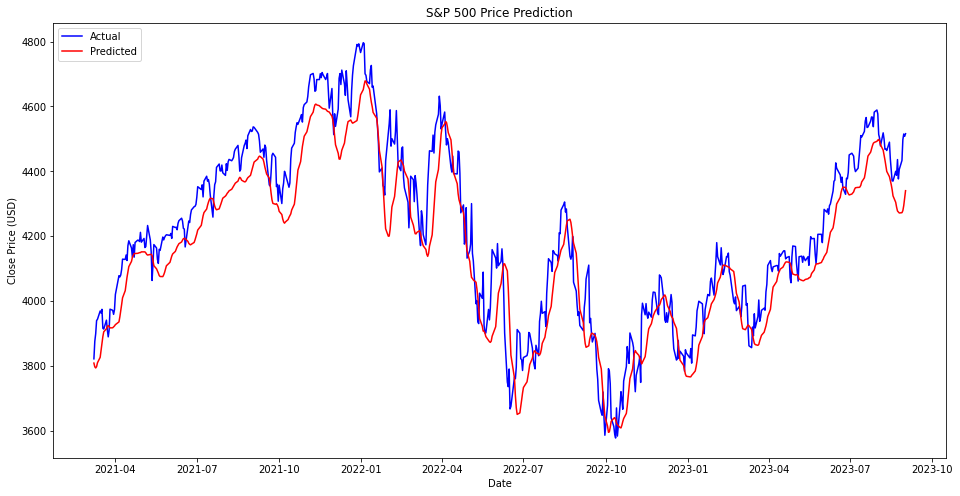

In [ ]:
# Plot the actual and predicted values
plt.figure(figsize=(16, 8))
plt.title('S&P 500 Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.plot(comparison_df['Actual'], label='Actual', color='blue')
plt.plot(comparison_df['Predicted'], label='Predicted', color='red')
plt.legend(loc='upper left')
plt.show()

## Step 8: Future Predictions
Now that we have a trained model, let's use it to make future predictions for the rest of 2023. To do this, we'll:
1. Use the most recent 60 days of data to predict the next day's closing price.
2. Append the predicted value to our data and repeat the process for as many days as we want to forecast.

In [ ]:
from datetime import timedelta

# Initialize variables for future prediction
future_days = 120  # Number of days to predict into the future
future_predictions = []
last_60_days_scaled = scaled_data[-60:]  # Most recent 60 days of data

# Loop to predict future prices
for i in range(future_days):
    last_60_days_reshaped = np.reshape(last_60_days_scaled, (1, 60, 1))
    next_day_prediction_scaled = model.predict(last_60_days_reshaped)
    next_day_prediction = scaler.inverse_transform(next_day_prediction_scaled)[0][0]
    future_predictions.append(next_day_prediction)
    last_60_days_scaled = np.append(last_60_days_scaled[1:], next_day_prediction_scaled, axis=0)
    
# Create a DataFrame to store the future predictions
future_dates = [data.index[-1] + timedelta(days=i+1) for i in range(future_days)]
future_predictions_df = pd.DataFrame(future_predictions, columns=['Predicted'], index=future_dates)
future_predictions_df.head()

1/1 [==============================] - 0s 26ms/step


,Predicted
2023-09-02,4364.480469
2023-09-03,4372.985840
2023-09-04,4372.103516
2023-09-05,4364.647949
2023-09-06,4352.214355


## Step 9: Visualizing Future Predictions
We've successfully generated future predictions for the S&P 500 for the next 120 days. Now let's visualize these predictions alongside the historical data to get a comprehensive view.

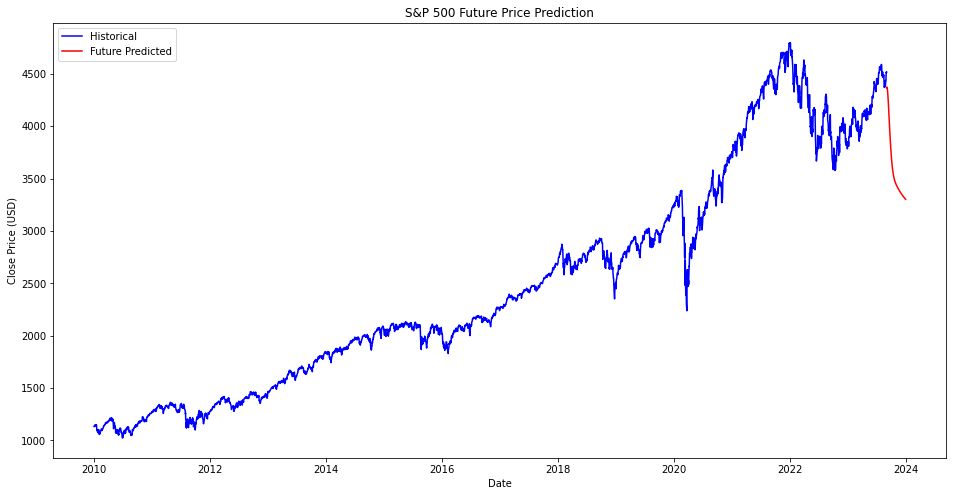

In [ ]:
# Plot the historical and future predicted values
plt.figure(figsize=(16, 8))
plt.title('S&P 500 Future Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.plot(data['Close'], label='Historical', color='blue')
plt.plot(future_predictions_df['Predicted'], label='Future Predicted', color='red')
plt.legend(loc='upper left')
plt.show()